## Step 1 : loading and understanding data

In [56]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
train = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')
train.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [58]:
#checking for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   Area             2709 non-null   int64  
 2   Perimeter        2709 non-null   float64
 3   MajorAxisLength  2709 non-null   float64
 4   MinorAxisLength  2709 non-null   float64
 5   AspectRation     2709 non-null   float64
 6   Eccentricity     2709 non-null   float64
 7   ConvexArea       2709 non-null   int64  
 8   EquivDiameter    2709 non-null   float64
 9   Extent           2709 non-null   float64
 10  Solidity         2709 non-null   float64
 11  roundness        2709 non-null   float64
 12  Compactness      2709 non-null   float64
 13  ShapeFactor1     2709 non-null   float64
 14  ShapeFactor2     2709 non-null   float64
 15  ShapeFactor3     2709 non-null   float64
 16  ShapeFactor4     2709 non-null   float64
dtypes: float64(14)

## step 2 preprocessing

In [60]:
#seperating data into label
train_features= train.drop(['y','ID'],axis=1)
train_features.head(1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,58238,971.303,397.202654,186.94551,2.124697,0.882317,58977,272.306674,0.604756,0.98747,0.775723,0.685561,0.00682,0.000929,0.469994,0.998595


In [61]:
test_features= test.drop('ID',axis=1)
test_features

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
2705,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
2706,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
2707,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


In [62]:
#encoding catagorical label
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['y']= label_encoder.fit_transform(train['y'])
train_label= train['y']
print(train_label.head(20))

0     4
1     5
2     3
3     3
4     6
5     5
6     4
7     6
8     5
9     6
10    0
11    2
12    6
13    6
14    3
15    4
16    5
17    5
18    1
19    3
Name: y, dtype: int32


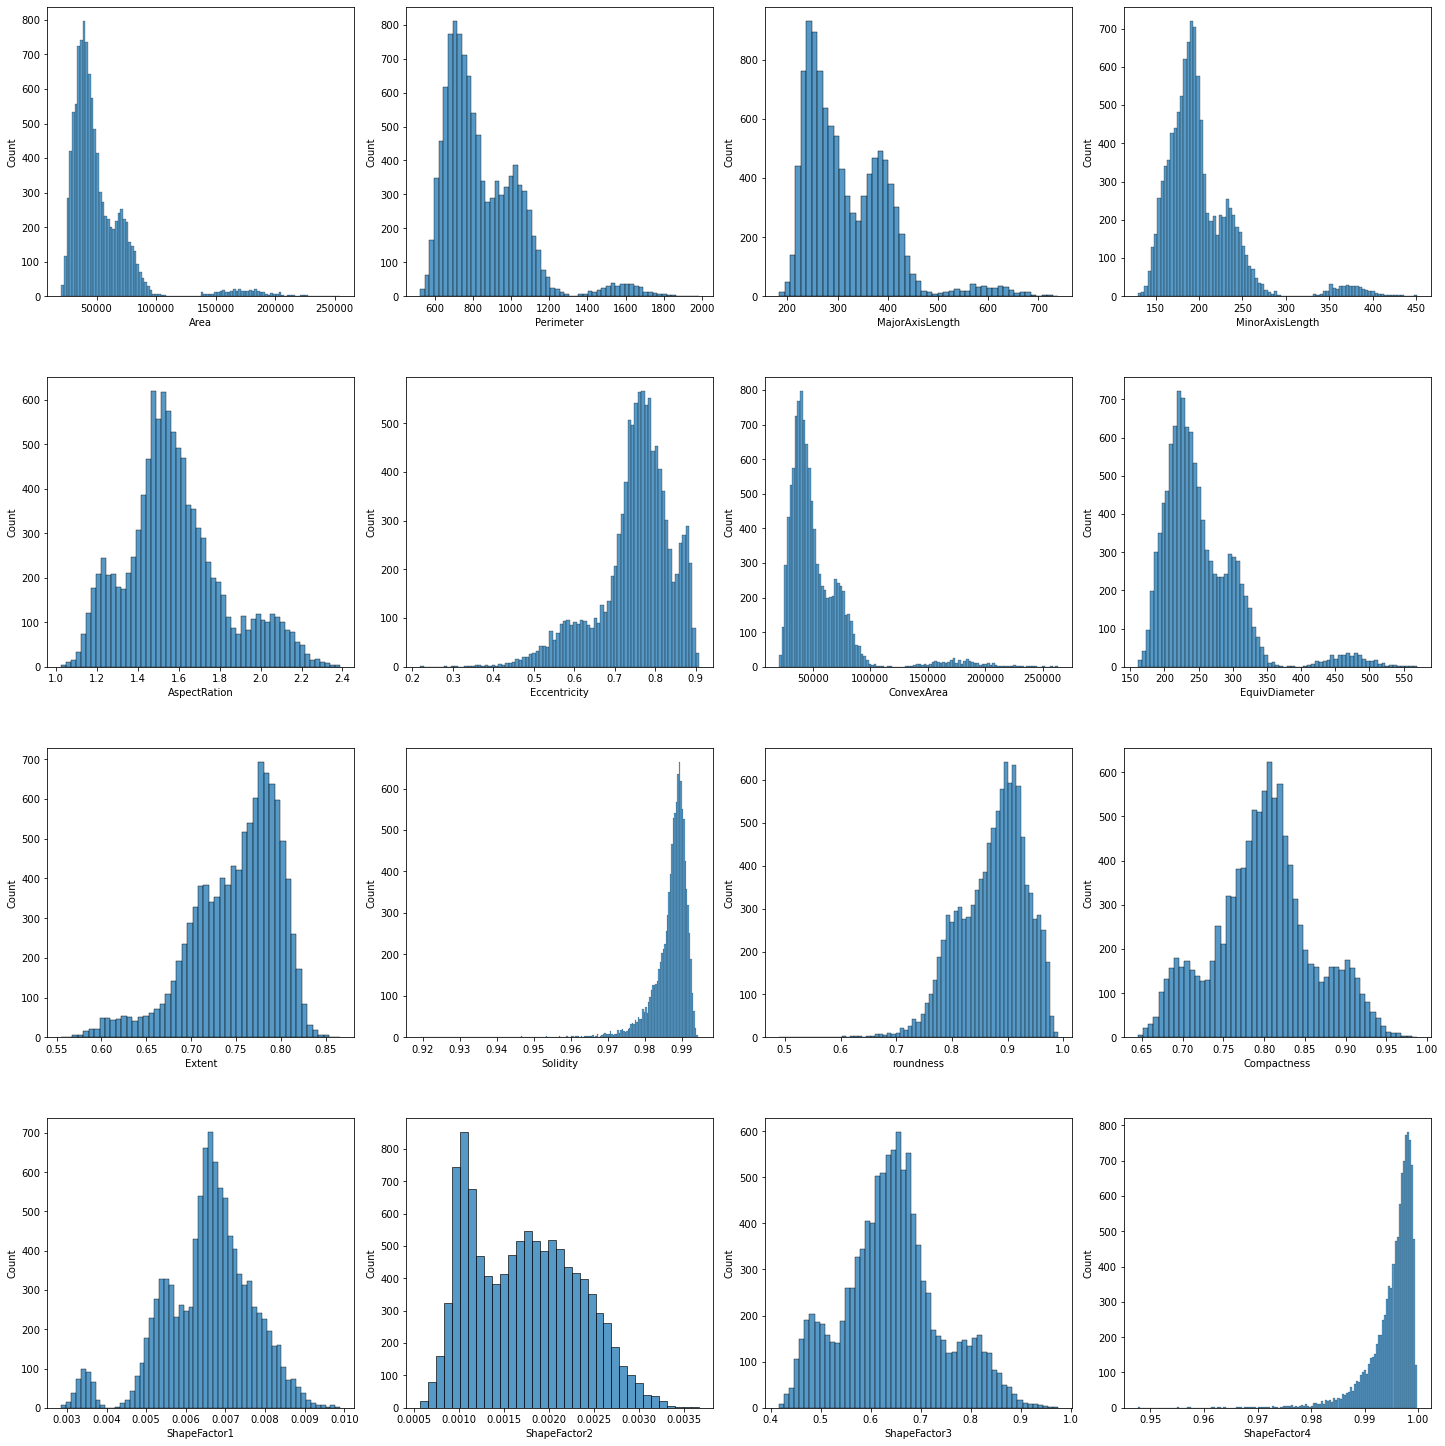

In [63]:

fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()

# loop for moving on the colums returned in k and values returned in v then histogram them ,to fill the list Axs with histograms
for k, v in train_features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)


from the graph we notice that features are highly skiewed

In [64]:
train_features.skew().sort_values(ascending=False)

Area               2.970246
ConvexArea         2.960315
MinorAxisLength    2.251468
EquivDiameter      1.971378
Perimeter          1.650773
MajorAxisLength    1.390286
AspectRation       0.589186
ShapeFactor2       0.292677
ShapeFactor3       0.245589
Compactness        0.038242
ShapeFactor1      -0.544873
roundness         -0.659566
Extent            -0.900892
Eccentricity      -1.075626
Solidity          -2.507634
ShapeFactor4      -2.628540
dtype: float64

In [65]:
train_features_logtransform = train_features[['MajorAxisLength', 'MinorAxisLength',
                                  'Eccentricity', 'ConvexArea', 'EquivDiameter',
                                  "Solidity","ShapeFactor4", 'Area','Perimeter']].apply(lambda x: np.log(x))

In [66]:
from sklearn.preprocessing import MinMaxScaler

x = train_features_logtransform.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_features_logtransformm = pd.DataFrame(x_scaled)


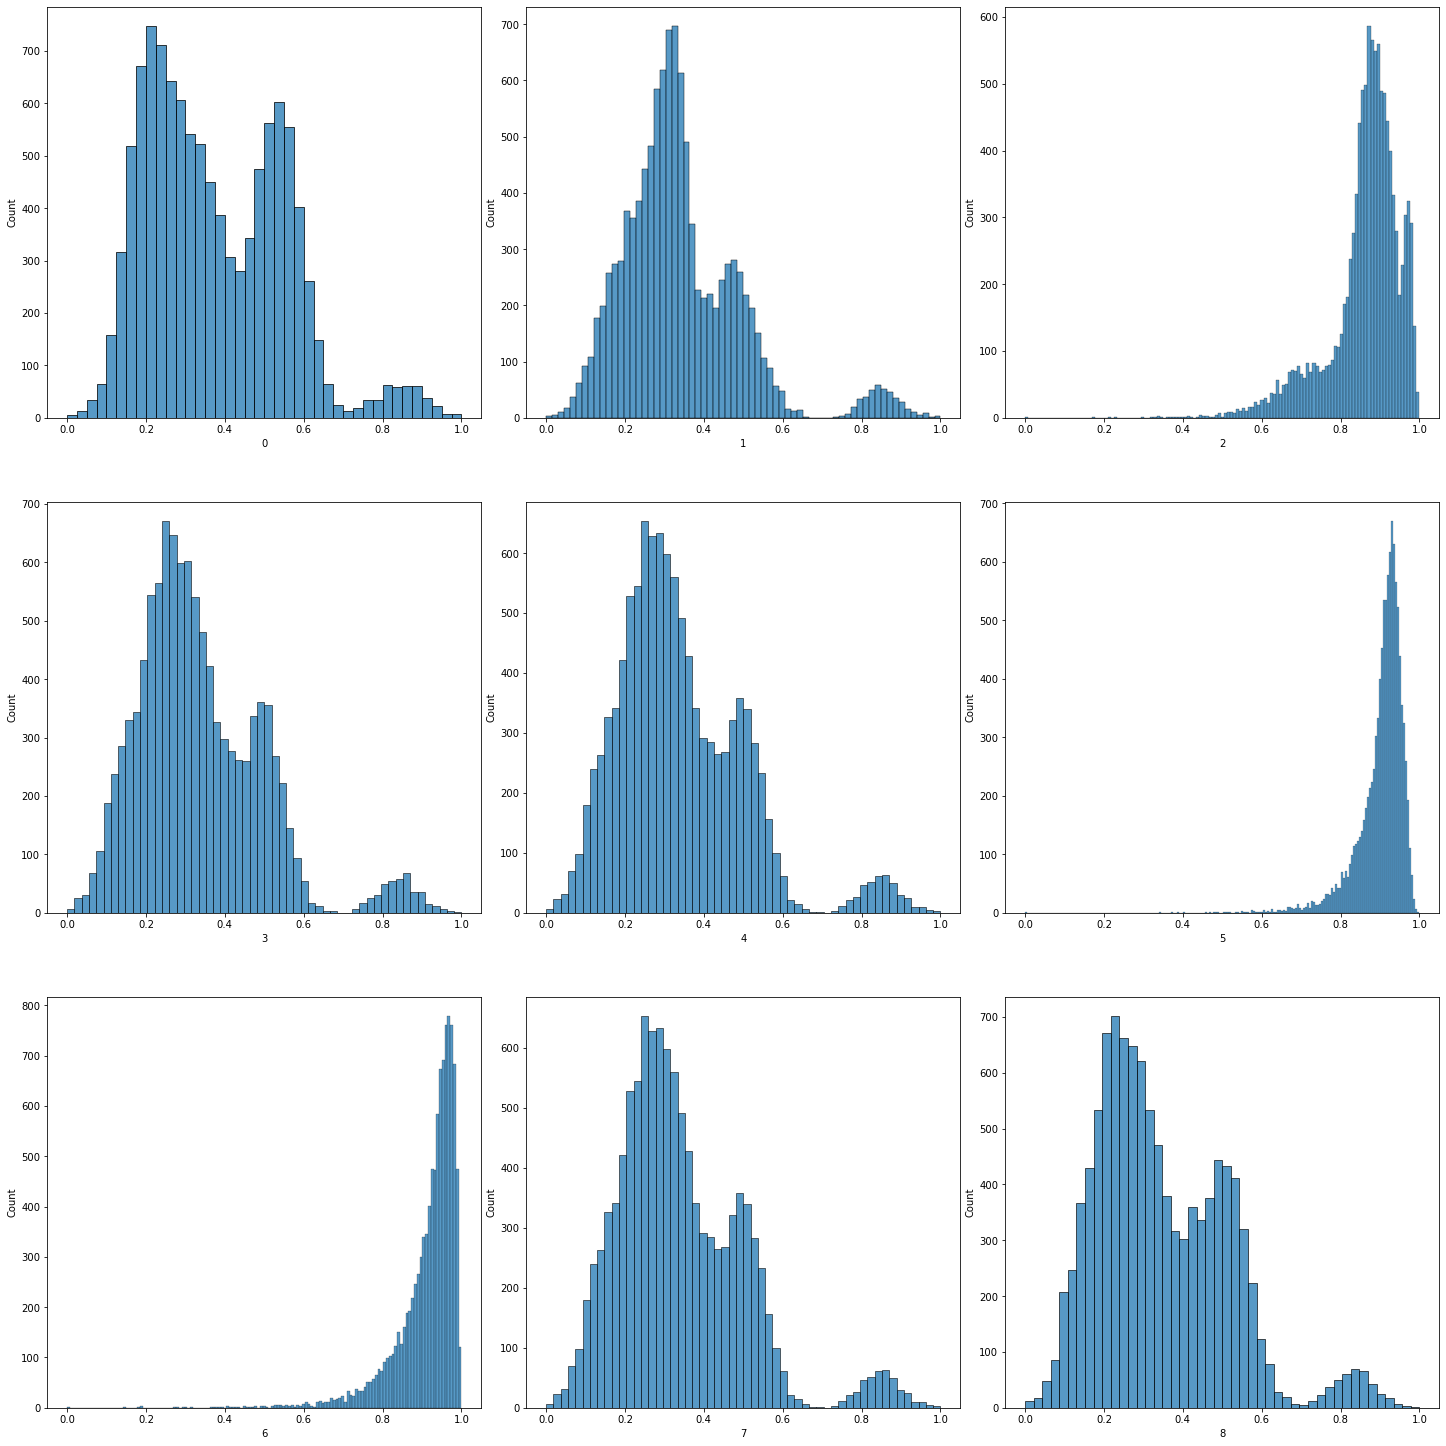

In [67]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
index = 0

axs = axs.flatten()

# loop for moving on the colums returned in k and values returned in v then histogram them ,to fill the list Axs with histograms
for k, v in train_features_logtransformm.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [68]:
train_features_logtransformm.head()

,0,1,2,3,4,5,6,7,8
0,0.554232,0.293936,0.979701,0.411901,0.415348,0.907782,0.978705,0.415348,0.462583
1,0.265157,0.402198,0.699691,0.303642,0.308853,0.992409,0.955746,0.308853,0.275795
2,0.192098,0.210259,0.829071,0.171963,0.173825,0.919560,0.962636,0.173825,0.165006
3,0.272839,0.281470,0.844487,0.251405,0.254172,0.927838,0.990971,0.254172,0.252026
4,0.306208,0.320478,0.843119,0.287953,0.290775,0.920057,0.939555,0.290775,0.293255


In [69]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(train_features[['MajorAxisLength', 'MinorAxisLength',
                                  'Eccentricity', 'ConvexArea', 'EquivDiameter',
                                  "Solidity","ShapeFactor4", 'Area','Perimeter']])
scaled=pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.897727,-0.342811,1.440028,0.172036,0.322783,0.068758,0.815760,0.174073,0.539713
1,-0.633401,0.256188,-1.729039,-0.301224,-0.253265,1.498190,0.531237,-0.290465,-0.454337
2,-0.932247,-0.753434,-0.420342,-0.726114,-0.880726,0.267127,0.616586,-0.725552,-0.937254
3,-0.600178,-0.406731,-0.247737,-0.486967,-0.520301,0.406669,0.967898,-0.484668,-0.564026
4,-0.451657,-0.203349,-0.263202,-0.359627,-0.343598,0.275515,0.330810,-0.357659,-0.371530


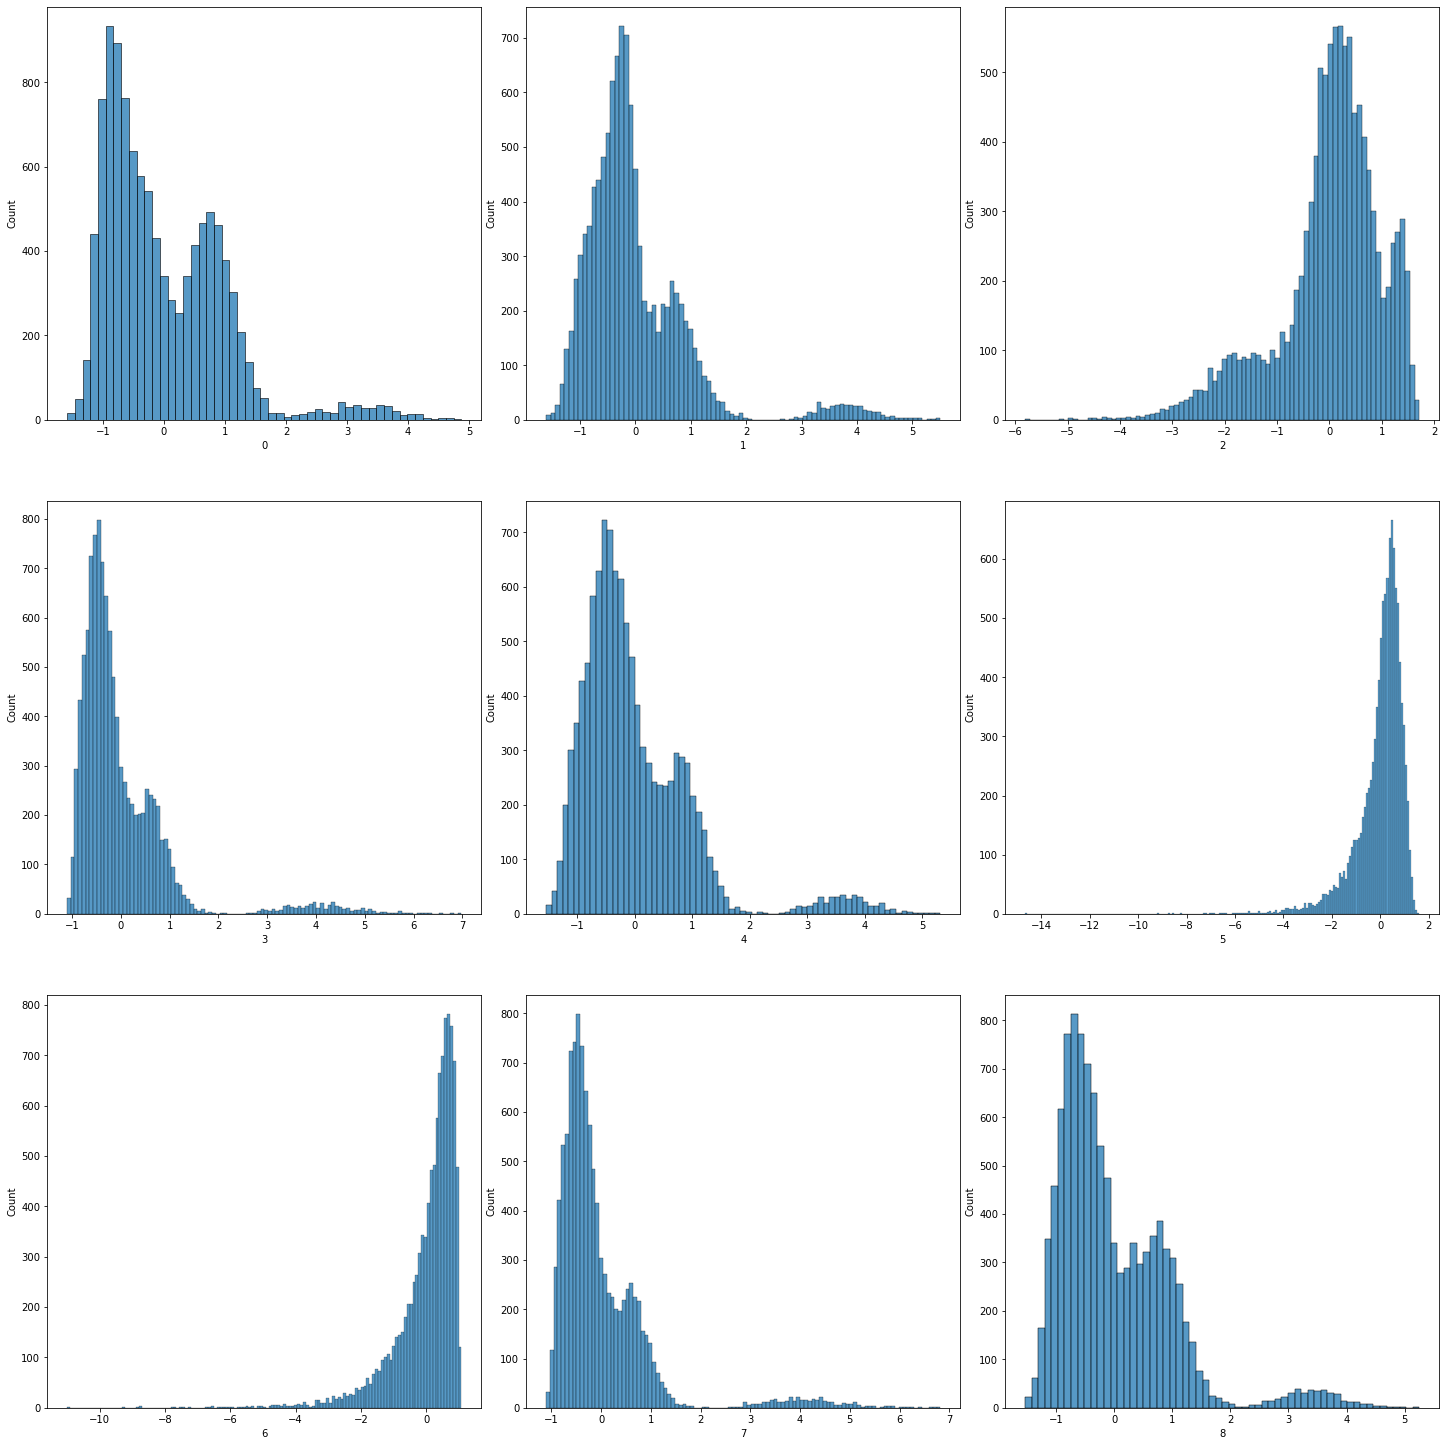

In [70]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
index = 0

axs = axs.flatten()

# loop for moving on the colums returned in k and values returned in v then histogram them ,to fill the list Axs with histograms
for k, v in scaled.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#h2_6

In [71]:
scaled.skew().sort_values(ascending=False)

7    2.970246
3    2.960315
1    2.251468
4    1.971378
8    1.650773
0    1.390286
2   -1.075626
5   -2.507634
6   -2.628540
dtype: float64

## step 3 Modeling

In [72]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import utils
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt


In [73]:
pip install xgboost


In [74]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.3 MB


In [75]:
from sklearn.model_selection import train_test_split
# remark: we fix random_state the end, to make sure we always get the same split
X_train, X_test, y_train, y_test = train_test_split(
    train_features, train_label, test_size=0.4, random_state=100)

In [76]:
#Multiclass classification
#https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

print(xgb_model.score(X_test, y_test))

#accuracy = accuracy_score( features_validation, labels_validation) 

#print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.9185509921550531


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

In [77]:
#https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
from sklearn.metrics import f1_score,recall_score,precision_score
lr_predicted_labels = xgb_model.predict(X_test)
print("Recall:", recall_score(y_test, lr_predicted_labels
                                           ,average='micro'))

print("Precision:", precision_score(y_test, lr_predicted_labels
                                           ,average='micro'))

print("F1-scoresn:", f1_score(y_test, lr_predicted_labels
                                           ,average='micro'))

Recall: 0.9185509921550531
Precision: 0.9185509921550531
F1-scoresn: 0.9185509921550531


links
https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663?gi=68a6ad896583
https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook
xgboost multiclass classification
https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f?gi=cb1496b50475
https://www.datatechnotes.com/2019/07/classification-example-with.html

In [78]:
#https://us.hidester.com/proxy.php?u=eJwBaQCW%2F3M6OTc6Iu%2FGJTuSKEI6k40BZ6KFtLBqWcKgozeU76x4LXvSdfj95E%2BAXdiL%2FPW9JboTkB%2FUNCAv%2FgBDNFK5k0hl%2FRc9tYdfhS%2By0FNW%2BW67jT1NYHJPz1jIs7u8OiVtcghREGHumP4iO2NfMmI%3D&b=7
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Lowest RMSE:  0.6961416734505943


In [79]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob",learning_rate= 0.01, max_depth= 6, n_estimators= 500, random_state=42)
xgb_model.fit(X_train, y_train)

print(xgb_model.score(X_test, y_test))

0.9185509921550531


In [81]:
test =pd.read_csv(r'test.csv')
iD=test['ID']
test=test.drop('ID',axis=1)

In [83]:
y = xgb_model.predict(test)

In [84]:
y

array([4, 3, 0, ..., 4, 3, 6], dtype=int64)

In [85]:
d={'id':iD, 'prdiction':y}
prediction = pd.DataFrame(d)

In [86]:
prediction.head()

,id,prdiction
0,10834,4
1,10835,3
2,10836,0
3,10837,3
4,10838,1


In [95]:
prediction['prdiction'].replace({0:'BARBUNYA', 1: 'BOMBAY', 2:'CALI', 3: 'DERMASON', 4:'HOROZ', 5: 'SEKER', 6:'SIRA'})

0          HOROZ
1       DERMASON
2       BARBUNYA
3       DERMASON
4         BOMBAY
          ...   
2704        CALI
2705       SEKER
2706       HOROZ
2707    DERMASON
2708        SIRA
Name: prdiction, Length: 2709, dtype: object

In [91]:
prediction.to_csv('submission.csv', index = False, encoding='utf-8')